<a href="https://colab.research.google.com/github/Nasabunc09/Pre_Entrega3_DataScience/blob/main/Notebooks/Proyecto4x4_rangointercuart%C3%ADlico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto 4x4 YPF - Primer pilar Vaca Muerta
El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.

Modelado
En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelado.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.

In [ ]:
#Descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df.csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad,Mes,Año
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,32,172,0,3844,2025,1
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,55,3,0,4945,2025,1


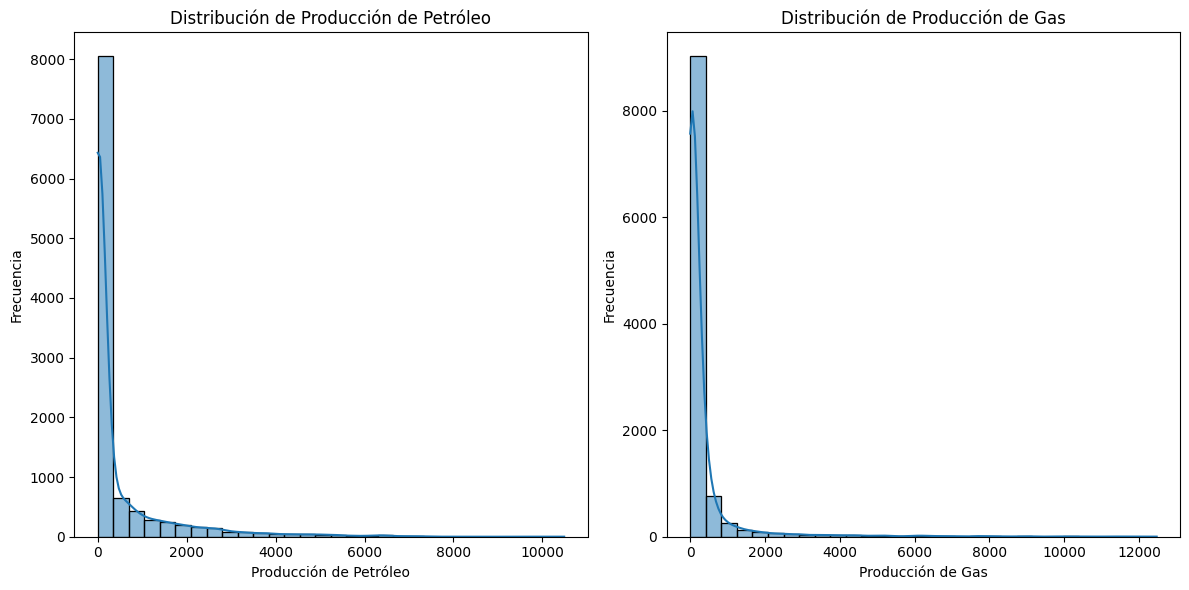

In [ ]:
#Histograma para la columna Producción de Petroleo y Producción de gas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Produccion_ypf['Produccion de Petroleo'], kde=True, bins=30)
plt.title('Distribución de Producción de Petróleo')
plt.xlabel('Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Produccion_ypf['Produccion de Gas'], kde=True, bins=30)
plt.title('Distribución de Producción de Gas')
plt.xlabel('Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***Interpretación Producción Petróleo***

**Forma:** Si el histograma muestra una forma simétrica (parecida a una campana) con el kde=True, podría indicar una distribución aproximadamente normal.

**Sesgo (skewness):**

Si los datos están concentrados hacia la izquierda con una cola a la derecha (derechamente sesgada), significa que la mayoría de las producciones son bajas, pero hay algunos meses con picos de producción más altos.

Si es al revés (cola hacia la izquierda), es menos común, pero puede indicar que la producción suele ser alta, con algunos valores inusualmente bajos.

**Número de picos:**

Si hay más de un pico, podrías estar viendo un comportamiento multimodal, lo que sugiere que hay diferentes grupos o períodos con distintos niveles de producción.

***Interpretación Producción Gas***

**Comparación con petróleo:**

¿La forma es parecida? Si ambos tienen formas similares, es posible que haya una correlación entre la producción de gas y petróleo.

**Dispersión:**

Si la curva es más extendida (más ancha), indica mayor variabilidad en la producción de gas a lo largo del tiempo.

**Outliers:**

Valores aislados o picos extremos pueden indicar eventos anómalos (por ejemplo, cortes operativos, descubrimientos o nuevas perforaciones).

In [ ]:
# Calcular el Rango Intercuartílico (IQR) para la Producción de Petróleo y Gas
Q1_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo = Q3_petroleo - Q1_petroleo

Q1_gas = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

print(f"Rango Intercuartílico para Producción de Petróleo: {IQR_petroleo}")
print(f"Rango Intercuartílico para Producción de Gas: {IQR_gas}")

Rango Intercuartílico para Producción de Petróleo: 324.75
Rango Intercuartílico para Producción de Gas: 232.0


**Producción de Petróleo: IQR = 324.75**

El 50% central de los datos (entre el cuartil 1 y el cuartil 3) tiene una dispersión de 324.75 unidades.

Esto indica variabilidad moderada o alta, dependiendo de la escala total de la producción.

**Producción de Gas: IQR = 232.0**

El 50% del centro de la distribución de producción de gas está en un rango de 232 unidades.

Es menos dispersa que la producción de petróleo, lo que sugiere que los valores son más concentrados en el centro de la distribución.



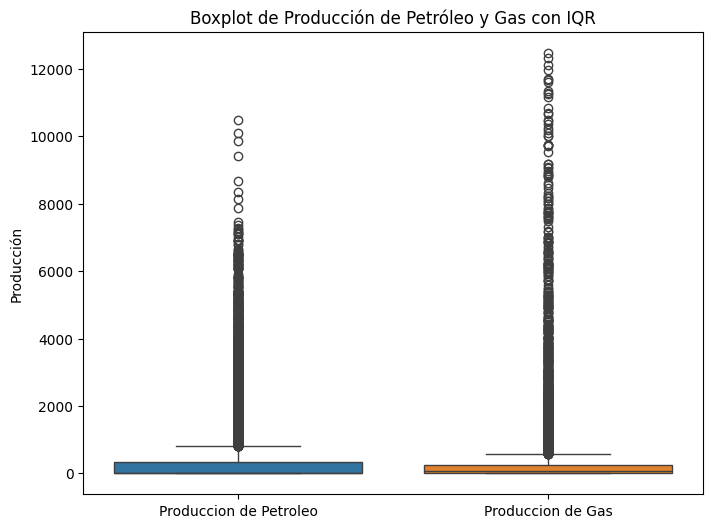

In [ ]:
#grafico rangos intercuartilicos anteriores

import matplotlib.pyplot as plt
# Crear un boxplot para visualizar los rangos intercuartílicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producción de Petróleo y Gas con IQR')
plt.ylabel('Producción')
plt.show()

**Explicacion del boxplot**

El eje Y representa el tamaño del residuo (es decir, el error).

El eje X indica la variable ('Petróleo' o 'Gas').

Parece haber asimetría o muchos outliers especialmente hacia valores positivos → puede indicar que el modelo subestima algunas veces, generando errores grandes.

Si la caja está muy desbalanceada o el centro (mediana) está lejos de 0, puede haber sesgo en la predicción.

Valores muy altos (> 12000) en residuos indican que el modelo falló seriamente en ciertos casos (grandes errores de predicción).

In [ ]:
#Calculamos el valor maximo y minimo de produccion de petroleo y gas

max_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].max()
min_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].min()

max_produccion_gas = Produccion_ypf['Produccion de Gas'].max()
min_produccion_gas = Produccion_ypf['Produccion de Gas'].min()

print(f"Valor máximo de producción de petróleo: {max_produccion_petroleo}")
print(f"Valor mínimo de producción de petróleo: {min_produccion_petroleo}")
print(f"Valor máximo de producción de gas: {max_produccion_gas}")
print(f"Valor mínimo de producción de gas: {min_produccion_gas}")

Valor máximo de producción de petróleo: 10489.0
Valor mínimo de producción de petróleo: 0.0
Valor máximo de producción de gas: 12469.0
Valor mínimo de producción de gas: 0.0


* max_produccion_petroleo
Es el mayor valor registrado en la columna de Producción de Petróleo.

Representa el pico máximo de producción mensual en tu conjunto de datos.

* min_produccion_petroleo
Es el menor valor registrado.

Puede indicar una crisis productiva, parada técnica, o el inicio del registro histórico.

* max_produccion_gas
El valor más alto de producción de gas en todo el período registrado.

Se puede relacionar con aumentos estacionales, nuevas perforaciones, o inversiones en infraestructura.

* min_produccion_gas
Muestra el valor más bajo: útil para identificar períodos de baja extracción o problemas operativos.

¿Para qué te sirve esto?
Contrastar con el IQR y outliers: Si los valores máximos están muy por encima de Q3+1.5×IQR, pueden ser outliers positivos.

Normalización o escalado: Al hacer modelos de predicción, estos valores son útiles si vas a hacer escalado Min-Max.

Comparar tendencias: Ver cómo fue cambiando la producción a lo largo del tiempo.

In [ ]:
#Calculamos la media para produccion de petroleo y produccion de gas con los valores nulos

print("Media para 'Produccion de Petroleo' incluyendo nulos:", Produccion_ypf['Produccion de Petroleo'].mean())
print("Media para 'Produccion de Gas' incluyendo nulos:", Produccion_ypf['Produccion de Gas'].mean())

Media para 'Produccion de Petroleo' incluyendo nulos: 460.7955100507233
Media para 'Produccion de Gas' incluyendo nulos: 341.92663911328196


In [ ]:
media_petroleo_sin_ceros = Produccion_ypf['Produccion de Petroleo'][(Produccion_ypf['Produccion de Petroleo'] != 0)].mean()
media_gas_sin_ceros = Produccion_ypf['Produccion de Gas'][(Produccion_ypf['Produccion de Gas'] != 0)].mean()

print(f"Media para 'Produccion de Petroleo' sin ceros: {media_petroleo_sin_ceros}")
print(f"Media para 'Produccion de Gas' sin ceros: {media_gas_sin_ceros}")

Media para 'Produccion de Petroleo' sin ceros: 744.179156553398
Media para 'Produccion de Gas' sin ceros: 448.68125231110565


| Variable               | Media (con ceros) | Media (sin ceros) | Diferencia |
| ---------------------- | ----------------- | ----------------- | ---------- |
| Producción de Petróleo | 460.80            | 744.18            | +283.38 ↑  |
| Producción de Gas      | 341.93            | 448.68            | +106.75 ↑  |


Qué significan estas diferencias?

1-Los ceros o valores nulos bajan fuertemente el promedio, especialmente en la producción de petróleo.

Esto puede deberse a meses sin producción registrada, errores de carga, o verdaderos valores cero (por ejemplo, al inicio de la explotación).

2-La media sin ceros refleja mejor la producción cuando hubo actividad real.

Esto es útil si estás analizando eficiencia operativa o productividad.

3-Diferencia más grande en petróleo:

La producción de petróleo parece tener más meses con producción cero o muy baja, comparado con la producción de gas.

Podría indicar interrupciones más frecuentes o una curva de desarrollo más reciente.



In [ ]:
#Calculamos la mediana para produccion de petroleo y produccion de gas

# Calcula la mediana de 'Produccion de Petroleo'
mediana_petroleo = Produccion_ypf['Produccion de Petroleo'].median()

# Calcula la mediana de 'Produccion de Gas'
mediana_gas = Produccion_ypf['Produccion de Gas'].median()

print(f"Mediana de Producción de Petróleo: {mediana_petroleo}")
print(f"Mediana de Producción de Gas: {mediana_gas}")

Mediana de Producción de Petróleo: 13.0
Mediana de Producción de Gas: 62.0


* Mediana de Producción de Petróleo: 13.0

La mitad de los meses tienen una producción menor o igual a 13, y la otra mitad mayor o igual.

Si la media (promedio) fuera mucho mayor que 13, sugeriría que hay outliers altos.

* Mediana de Producción de Gas: 62.0

Similarmente, el 50% de los datos están por debajo de 62 y el otro 50% por encima.

Te indica que la producción de gas tiende a concentrarse cerca de ese valor.

In [ ]:
# Función para crear un filtro basado en el IQR
def filtrar_por_iqr(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    return columna.between(Q1, Q3)

# Aplicar filtro IQR a las columnas de interés
filtro_petroleo = filtrar_por_iqr(Produccion_ypf['Produccion de Petroleo'])
filtro_gas = filtrar_por_iqr(Produccion_ypf['Produccion de Gas'])

# Conservar solo las filas donde ambas columnas estén dentro del IQR
Produccion_ypf_filtrado = Produccion_ypf[filtro_petroleo & filtro_gas]

**Filtramos las columnas de interés**

In [ ]:

Produccion_ypf_filtrado.head(20)


,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad,Mes,Año
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,172.0,0.0,3844.0,2025.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,55.0,3.0,0.0,4945.0,2025.0,1.0
8,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,22.0,4.0,3069.0,2025.0,1.0
11,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,20.0,4.0,3155.0,2025.0,1.0
12,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,13.0,21.0,3075.0,2025.0,1.0
14,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,182.0,61.0,3252.0,2025.0,1.0
15,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,18.0,9.0,3050.0,2025.0,1.0
16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,120.0,0.0,1933.0,2025.0,1.0
17,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,16.0,3.0,3068.0,2025.0,1.0
18,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,22.0,16.0,3060.0,2025.0,1.0


In [ ]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [ ]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()


,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.0,172.0,3844.0,2025.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0,2025.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0,2025.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0,2025.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3.0,4945.0,2025.0,1.0


In [ ]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas


['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal**

La regresión lineal es un modelo matemático que se usa para predecir un valor numérico (variable dependiente, y) en función de una o más variables independientes (x), asumiendo que la relación entre ellas es lineal.

En este caso seria para predecir la producción de petróleo y gas en el futuro.

Producción de Petróleo = a* Cantidad de pozos + b* Inversión + C

In [ ]:
#es la copia del dataframe nuevo que si contiene Produccion de petróleo y Producción de gas
Produccion_ypf_copia2 = Produccion_ypf.copy()


In [ ]:
#Estas columnas son variables dependientes (targets) y las estámos quitando para entrenar un modelo con el resto de las variables (predictoras).
x = Produccion_ypf_filtrado.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [ ]:
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Producción de agua,Profundidad,Mes,Año
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3844.0,2025.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4945.0,2025.0,1.0
8,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3069.0,2025.0,1.0
11,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3155.0,2025.0,1.0
12,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,3075.0,2025.0,1.0


In [ ]:
#almacena esa lista de nombres.
lista_atributos = x.columns

In [ ]:
#en la variable y, que representa las variables objetivo (targets) en modelos predictivos
y = Produccion_ypf_filtrado[['Produccion de Petroleo','Produccion de Gas']]

In [ ]:
#x = se convierte en array con atributos/predictoras
#y = se convierte en array con targets (logarítmicos)
x, y =np.array(x), np.array(y)

In [ ]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.844e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.945e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.069e+03, 2.025e+03,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.578e+03, 2.025e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.705e+03, 2.025e+03,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.019e+03, 2.025e+03,
        2.000e+00]])

In [ ]:
y[:10]

array([[ 32., 172.],
       [ 55.,   3.],
       [ 10.,  22.],
       [  7.,  20.],
       [ 32.,  13.],
       [  0., 182.],
       [  4.,  18.],
       [  0., 120.],
       [ 36.,  16.],
       [  4.,  22.]])

# Separando Train-Test
Train (entrenamiento) → lo usás para entrenar el modelo
Test (prueba) → lo usás para evaluar qué tan bien predice el modelo en datos nuevos

In [ ]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [ ]:
#un numero aleatorio para fijar cuantas veces testeamos
#test_size=0.2: reserva el 20% de los datos para prueba
#random_state=42: fija la "semilla" aleatoria para que la división sea siempre la misma si se corre más de una vez (reproducibilidad)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [ ]:
x.shape

(3891, 45)

In [ ]:
X_train.shape

(3112, 45)

In [ ]:
y_test.shape

(779, 2)

In [ ]:
X_test.shape

(779, 45)

In [ ]:
#Usamos modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

# Modelo Residuo
Los residuos te muestran qué tan lejos estuvo la predicción del modelo respecto al valor real. Analizar los residuos es clave para verificar:

*si el modelo está sesgado

*si hay patrones no capturados por el modelo

*si los errores son grandes (outliers)

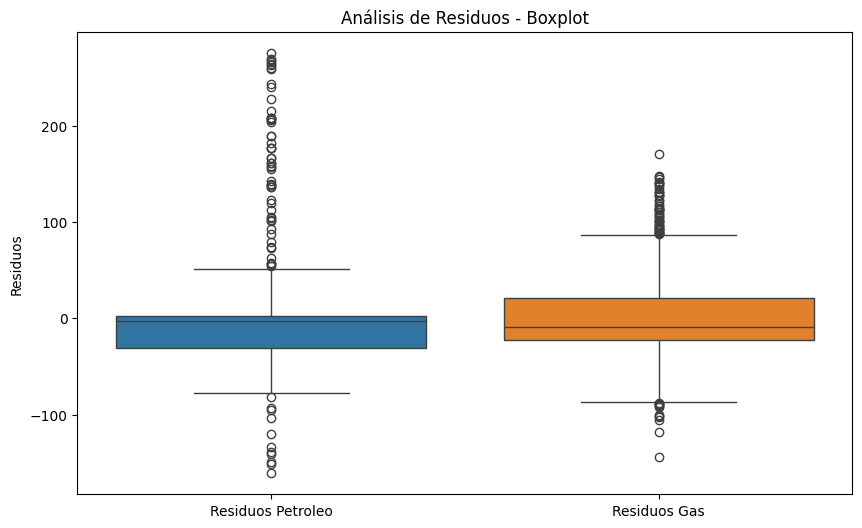

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('Análisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()

# Explicacion del boxplot

El eje Y representa el tamaño del residuo (es decir, el error).

El eje X indica la variable ('Petróleo' o 'Gas').

Parece haber asimetría o muchos outliers especialmente hacia valores positivos → puede indicar que el modelo subestima algunas veces, generando errores grandes.

Si la caja está muy desbalanceada o el centro (mediana) está lejos de 0, puede haber sesgo en la predicción.

Valores muy altos (> 12000) en residuos indican que el modelo falló seriamente en ciertos casos (grandes errores de predicción).

# Modelo de Predicción
El modelo intenta predecir la producción de petróleo y gas con datos que nunca ha visto.

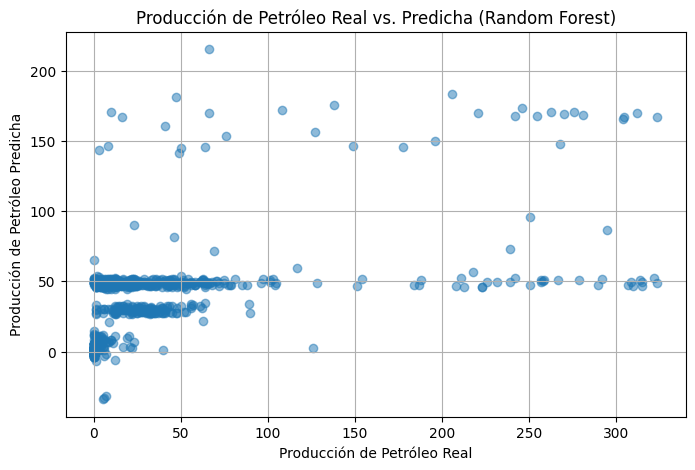

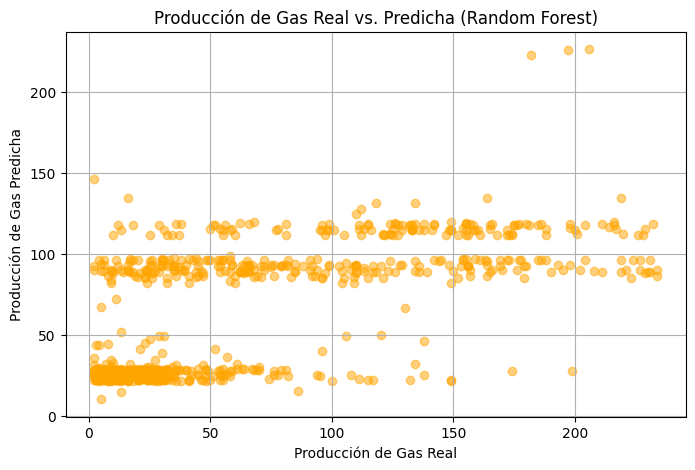

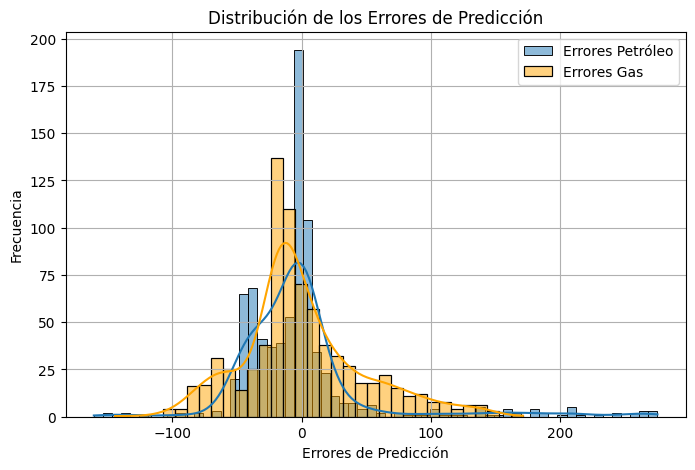

In [ ]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()


# Interpretación de los gráficos

*Gráficos de dispersión: valores reales vs. predichos

Eje X: Producción real de Petróleo Eje Y: Producción predicha Si los puntos están cerca de una línea diagonal (y = x), significa que el modelo predijo bien.

*Gráfico de distribucción de los Errores de Predicción

El eje X muestra el tamaño del error de predicción. El eje Y muestra la frecuencia de esos errores. Si los errores están centrados cerca de 0 y tienen forma simétrica, el modelo es preciso y no está sesgado. Si los errores son muy dispersos o asimétricos, hay problemas (como sesgo o outliers).

### **Random Forest**

Es un algoritmo de aprendizaje automático supervisado que se usa para solucionar problemas de clasificación y regresión. Construye árboles de decisión a partir de diferentes muestras y toma su voto mayoritario para decidir la clasificación y el promedio en caso de regresión. Ventajas. Los Bosques Aleatorios se consideran un método muy preciso y robusto debido al número de árboles de decisión que participan en el proceso. No sufre el problema del sobreajsute. La razón principal es que toma el promedio de toas las predicciones, lo que anula los sesgos.

In [ ]:
#importo las librerias de RandomForestRegressor y error medio absoluto
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [ ]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [ ]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred


array([[  0.2  ,  76.475],
       [  1.75 ,  82.6  ],
       [  0.2  ,  78.525],
       ...,
       [  0.4  ,  68.2  ],
       [ 22.35 ,  15.25 ],
       [ 17.8  , 113.4  ]])

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

27.394111039794613

* Si tu variable objetivo (y_test) está en una escala numérica grande, este error puede considerarse pequeño o aceptable.

* Si tu variable objetivo tiene valores entre, por ejemplo, 0 y 100, entonces 27.39 es un error considerable.

* El MAE no penaliza los errores grandes de forma cuadrática (como el MSE), por lo tanto, es más robusto frente a valores atípicos.





In [ ]:
#Agregar un pequeño valor epsilon para evitar división por cero
epsilon = 1e-10
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: 391238767775.56%


Ese MAPE = 391,238,767,775.56% (más de 391 mil millones por ciento) es extremadamente alto y claramente no es realista. Este valor sugiere que hay un problema serio en el cálculo o en los datos usados. Vamos a revisar por qué puede estar pasando:

Problema común:
Si algún valor real (y_test) es 0 o muy cercano a 0, el denominador se hace cero o casi cero, lo cual explota el resultado, generando valores enormes o infinitos.

In [ ]:
#Revisa si y_test contiene ceros o valores muy pequeños:
print((y_test == 0).sum())  # cuántos ceros hay
print(y_test.min())         # valor mínimo


199
0.0


In [ ]:
mask = y_test != 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print("MAPE corregido:", mape)

MAPE corregido: 142.98553144407705


Interpretación del resultado:
MAPE = 142.99% significa que, en promedio, tu modelo se equivoca un 142.99% respecto al valor real, lo cual sigue siendo muy alto.

En general, un MAPE aceptable depende del contexto, pero:

| MAPE (%) | Interpretación         |
| -------- | ---------------------- |
| < 10     | Excelente              |
| 10 – 20  | Bueno                  |
| 20 – 50  | Aceptable / Regular    |
| > 50     | Malo / Requiere mejora |


Entonces, 142.99% indica un modelo con bajo rendimiento predictivo.

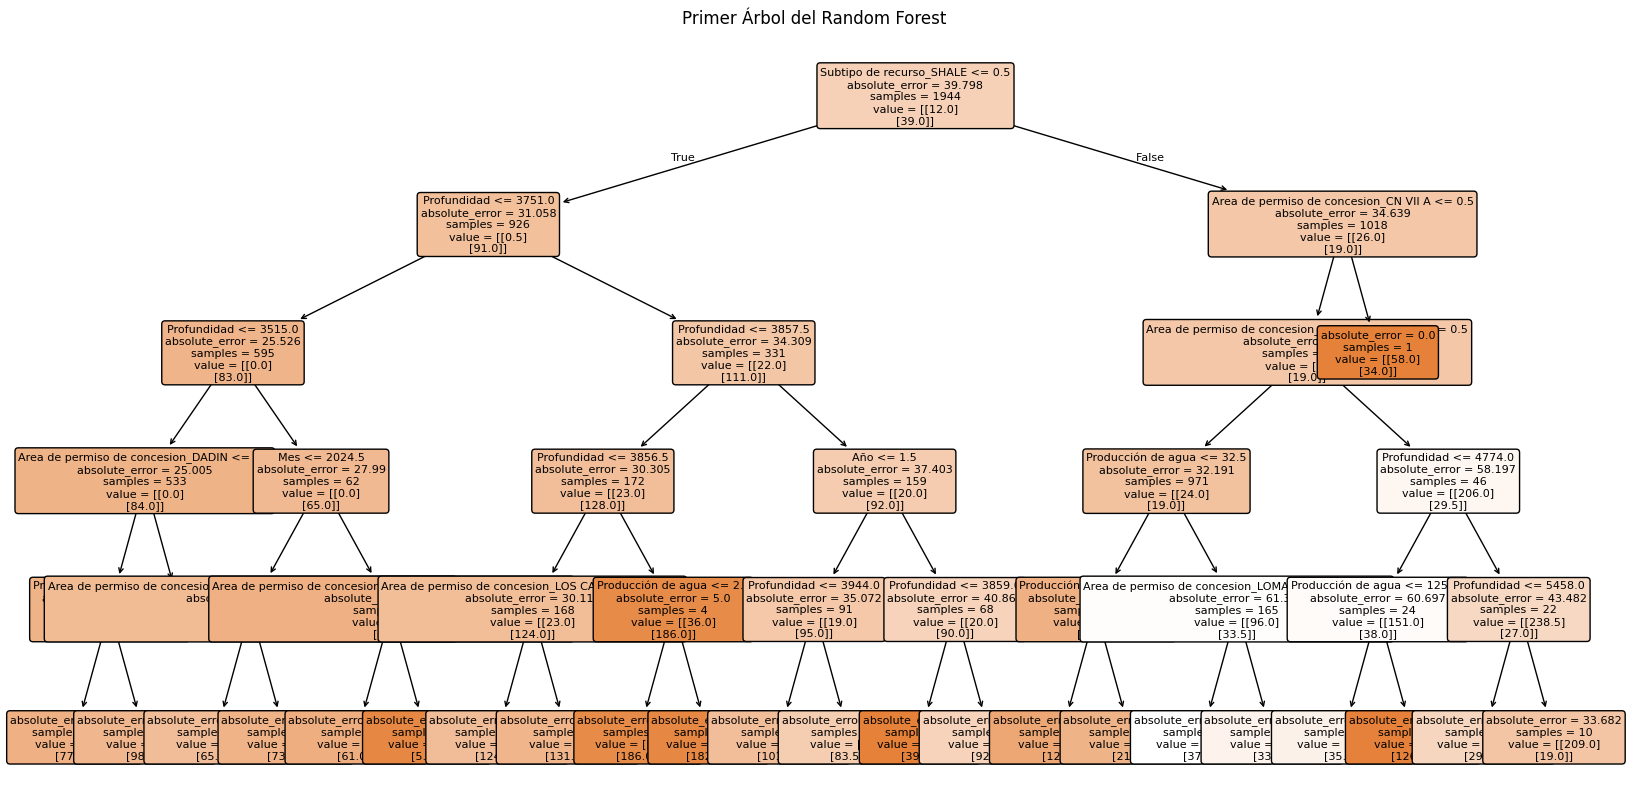

In [ ]:
#Gráfico de árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")

**Interpretacion del gráfico:**

El gráfico es como un mapa de decisiones que usa el modelo para predecir.

Cada nodo representa una pregunta sobre un valor.

Sigues las ramas según las respuestas hasta llegar a una predicción final.

### **Support Vector Machine**

Una máquina de vectores de soporte (SVM) es un algoritmo de machine learning supervisado que clasifica los datos mediante la búsqueda de una línea o un hiperplano óptimos que maximice la distancia entre cada clase en un espacio N-dimensional.

In [ ]:
#importamos librerias de SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [ ]:
#crea y entrena un modelo de regresión de vectores de soporte de múltiples salidas
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [ ]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [ ]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[11.79509186, 37.12741879],
       [ 7.78746893, 36.94698539],
       [ 6.59562226, 36.89397777],
       ...,
       [15.30643466, 37.28853425],
       [11.0158851 , 37.09210875],
       [17.14533065, 37.372785  ]])

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

38.727208821910565

Un MAE de 38.73 significa que el modelo se equivoca en promedio por 38.73 unidades respecto al valor real.

Si tu variable y está en el rango de cientos o miles, este error puede ser razonablemente aceptable, aunque puede seguir mejorando.

**Gráfico support vector machine**

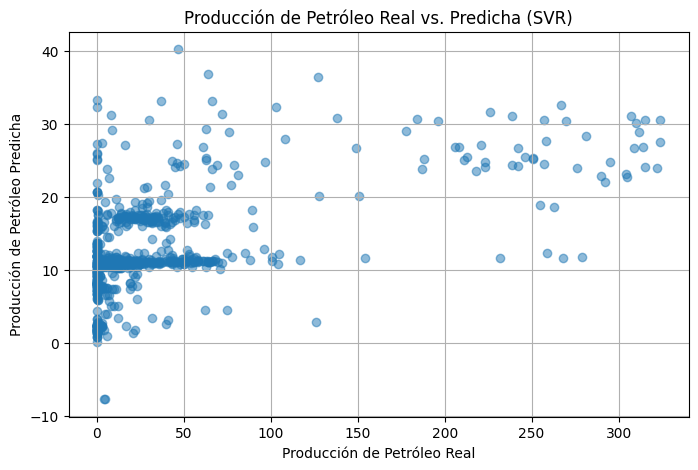

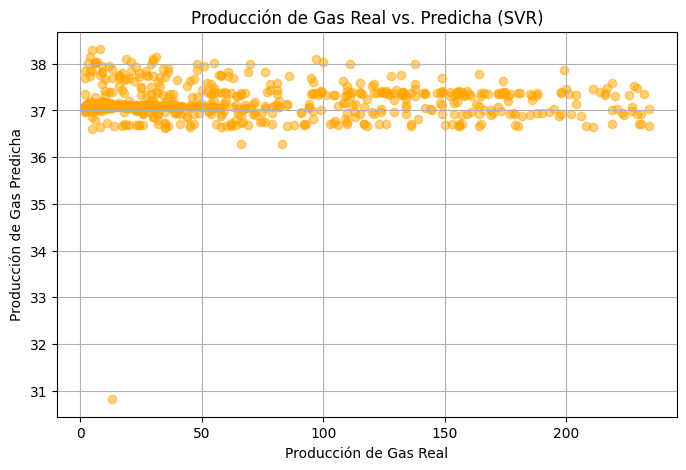

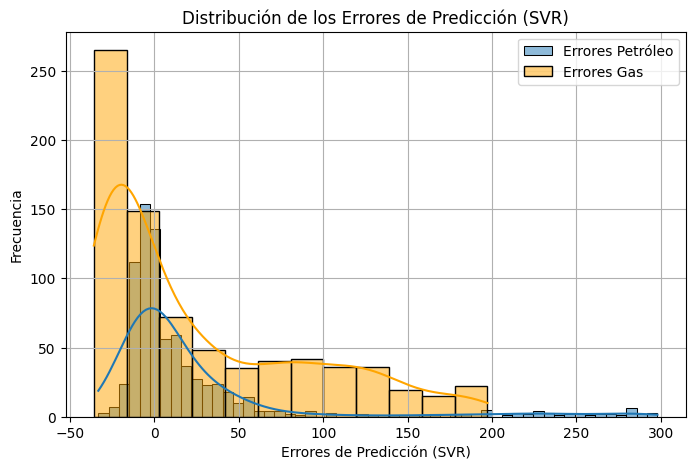

In [ ]:
# gráfico support vector machine

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()

**Interpretacion del grafico**
El gráfico compara los valores reales (de prueba) con los valores predichos por el modelo SVR (Support Vector Regression) para dos variables:

*Producción de Petróleo

*Producción de Gas

**Cómo interpretarlo:**

Eje X: Valores reales (y_test) de producción (petróleo o gas).

Eje Y: Valores que el modelo predijo (y_pred_svr) para esas mismas variables.

Cada punto representa un ejemplo/test en el conjunto de datos.

Si el modelo fuera perfecto, todos los puntos estarían exactamente sobre la línea diagonal y = x, es decir, donde valor real = valor predicho.

**Qué indica la dispersión:**

Si los puntos están muy cerca de la diagonal, el modelo predice bien.

Si están muy dispersos o alejados, el modelo tiene errores grandes en esas predicciones.

La transparencia (alpha=0.5) ayuda a ver dónde hay mayor concentración de puntos (más puntos sobrepuestos se ven más oscuros).

### **XGBoost**

Se basa en el marco de trabajo del boosting. Boosting es una técnica de conjunto donde se agregan nuevos modelos para corregir los errores cometidos por los modelos existentes. La idea clave detrás de XGBoost es que podemos utilizar el marco de trabajo de boosting en el corazón de AdaBoost (Adaptive Boosting - Aumento Adaptativo, es un algoritmo de aprendizaje automático ajusta los pesos de las instancias de entrenamiento en cada iteración) y aplicarlo a cualquier función de pérdida diferenciable. Esto hace que XGBoost sea aplicable a una amplia variedad de problemas de regresión y clasificación. La principal ventaja de XGBoost es su velocidad de ejecución superior y su rendimiento del modelo. También tiene regularización incorporada que ayuda a prevenir el sobreajuste. XGBoost también es capaz de manejar valores faltantes y proporciona varias formas de tratar valores atípicos



In [ ]:
#importamos la libreria de XGBoost
from xgboost import XGBRegressor

In [ ]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [ ]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 25.53389323821987
RMSE: 42.05916642816314
R²: 0.5554655196207539


(MAE) mean_absolute_error
Definición: Promedio de los errores absolutos entre los valores reales y los predichos. Interpretación: Es fácil de entender (está en las mismas unidades que la variable). Penaliza por igual todos los errores. Cuanto más bajo, mejor.

(RMSE) root mean squared error
Definición: Raíz cuadrada del error cuadrático medio. Interpretación: Penaliza más fuertemente los errores grandes (por eso suele ser mayor que MAE). También está en las mismas unidades que la variable. Cuanto más bajo, mejor.

(R²) r2_score
Definición: Coeficiente de determinación. Interpretación: Mide qué proporción de la varianza de y es explicada por el modelo. Rango típico: de 0 a 1 (aunque puede ser negativo si el modelo es peor que una constante).

R² = 1: predicción perfecta.

R² = 0: el modelo no explica nada.

R² negativo: el modelo es peor que simplemente predecir el promedio.

### **Optimización: Gridsearch**

GridSearchCV busca la mejor combinación de hiperparámetros evaluando todas las combinaciones posibles dentro de una "grilla" (grid), usando validación cruzada.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.9}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24.864857216140877
RMSE: 41.91029093723764
R²: 0.5584639065873832


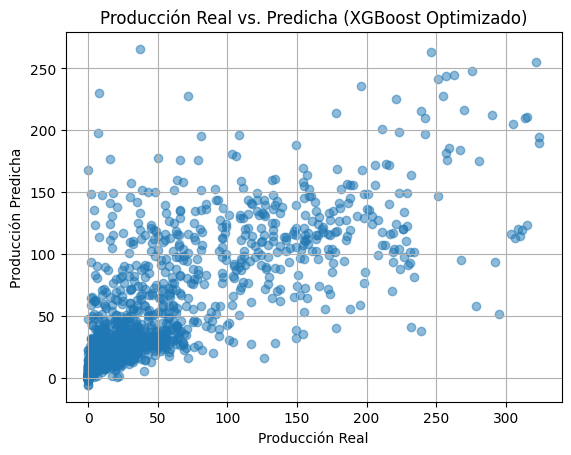

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()

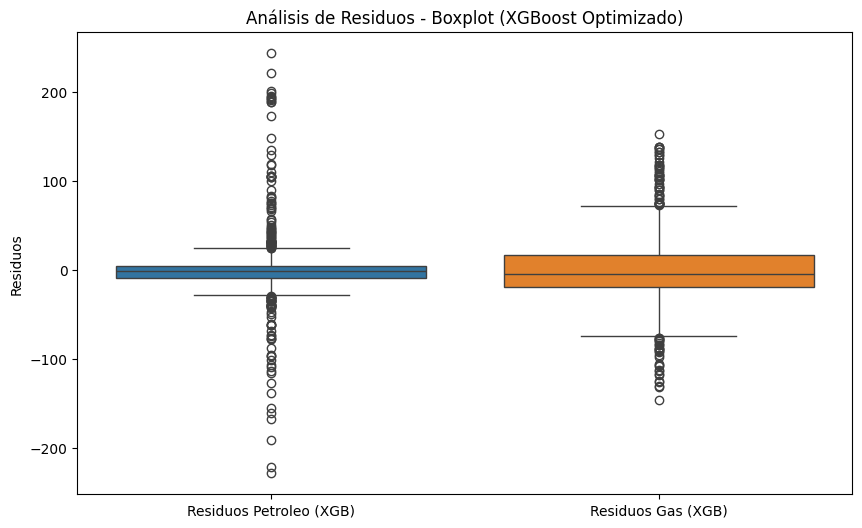

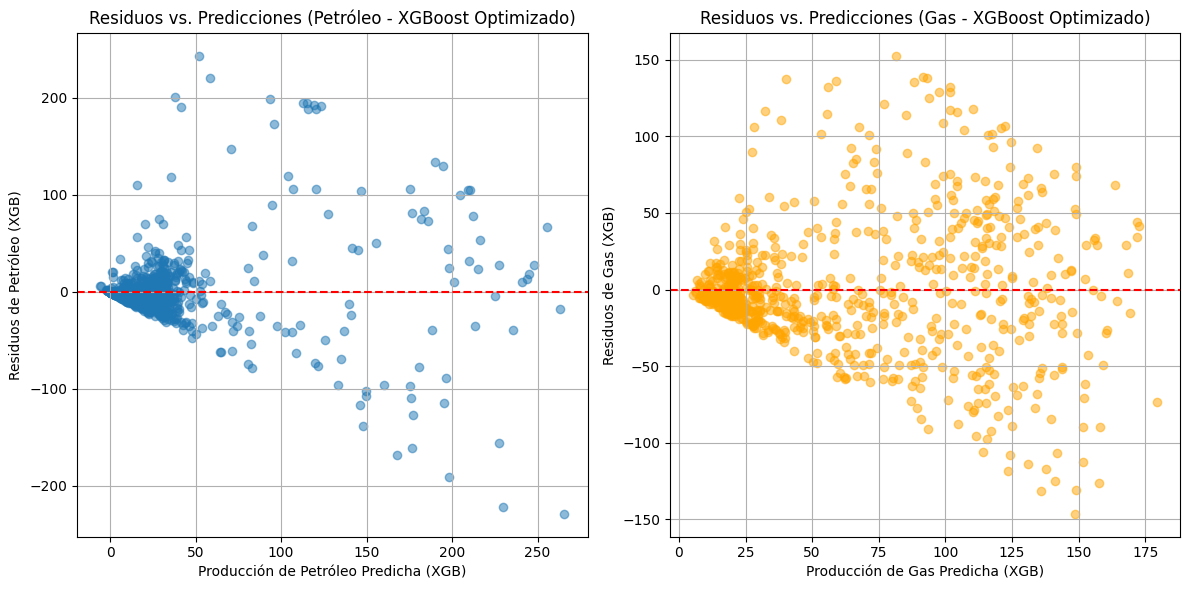

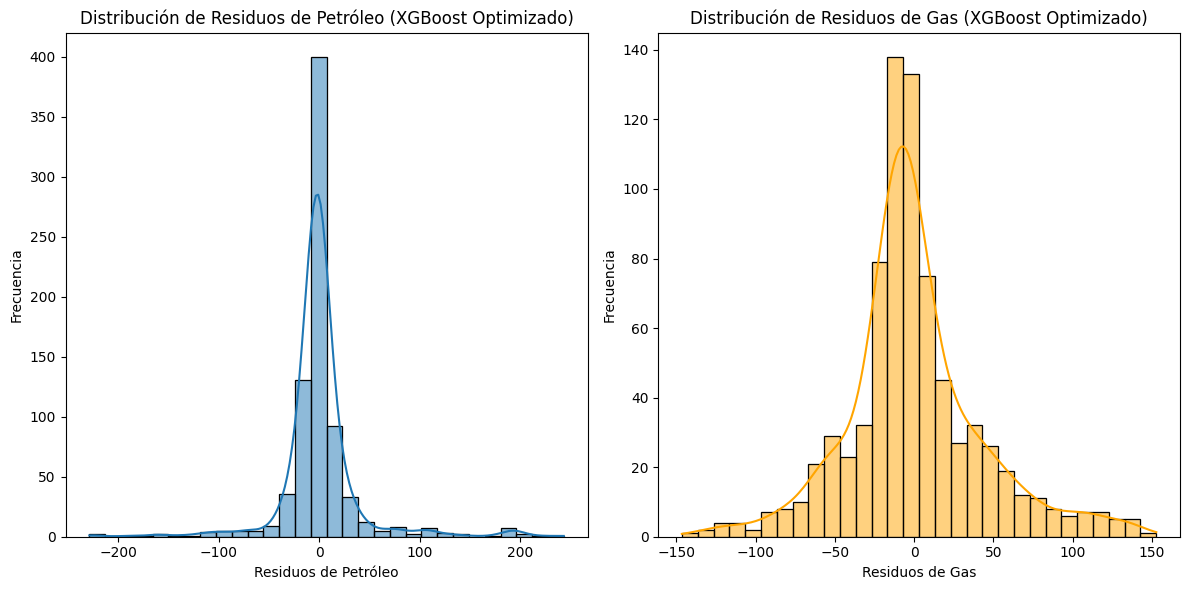

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calcular los residuos del modelo XGBoost optimizado
residuals_xgb = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_xgb_df = pd.DataFrame(residuals_xgb, columns=['Residuos Petroleo (XGB)', 'Residuos Gas (XGB)'])

# Crear boxplots para los residuos del modelo XGBoost
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_xgb_df)
plt.title('Análisis de Residuos - Boxplot (XGBoost Optimizado)')
plt.ylabel('Residuos')
plt.show()

# Graficar los residuos frente a los valores predichos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_xgb[:, 0], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Producción de Petróleo Predicha (XGB)')
plt.ylabel('Residuos de Petróleo (XGB)')
plt.title('Residuos vs. Predicciones (Petróleo - XGBoost Optimizado)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_xgb[:, 1], alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Producción de Gas Predicha (XGB)')
plt.ylabel('Residuos de Gas (XGB)')
plt.title('Residuos vs. Predicciones (Gas - XGBoost Optimizado)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Histograma de los residuos para ver su distribución
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_xgb[:, 0], kde=True, bins=30)
plt.title('Distribución de Residuos de Petróleo (XGBoost Optimizado)')
plt.xlabel('Residuos de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb[:, 1], kde=True, bins=30, color='orange')
plt.title('Distribución de Residuos de Gas (XGBoost Optimizado)')
plt.xlabel('Residuos de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()